# Consolidated test notebook

In [202]:
import sys
sys.path.insert(1, '..')
import cocoa.cocoa as cc

In [203]:
help(cc)

Help on module cocoa.cocoa in cocoa:

NAME
    cocoa.cocoa

DESCRIPTION
    Project : CoCoA - Copyright © CoCoa-team-17 
    Date :    april-june 2020
    Authors : Olivier Dadoun, Julien Browaeys, Tristan Beau
    License: See joint LICENSE file
    
    About
    ----- 
    
    This is the CoCoA front end functions. It provides easy access and 
    use of the whole CoCoA framework in a simplified way.
    
    The use can change the database, the type of data, the output format
    with keywords (see help of functions below).
    
    Basic usage
    -----------
    
    ** plotting covid deaths (default value) vs. time **
    
        import cocoa.cocoa as cc
        cc.plot(where='France')  # where keyword is mandatory
    
    ** getting recovered data for some countries **
        
        cc.get(where=['Spain','Italy'],which='recovered')
    
    ** listing available database and which data can be used **
        cc.listwhom()
        cc.setwhom('JHU')     # return available ke

In [204]:
help(cc.get)

Help on function get in module cocoa.cocoa:

get(**kwargs)
    Return covid19 data in specified format output (default, by list) 
    for specified locations ('where' keyword). 
    The used database is set by the setbase() function but can be
    changed on the fly ('whom' keyword)
    
    Keyword arguments
    -----------------
    
    where  --   a single string of location, or list of (mandatory, 
                no default value)
    what   --   what sort of data to deliver ( 'death','confirmed',
                'recovered' …). See getwhat() function for full
                list according to the used database.
    which  --   which data are computed, either in cumulative mode 
                ( 'cumul', default value) or 'daily' or other. See 
                getwhich() for fullist of available 
                Full list of which keyword with the 
    whom   --   Database specification (overload the setbase() 
                function)
             
    output --   output forma

In [205]:
cc.get(where='Spain',which='confirmed',what='Diff')

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      1,      0,      0,      0,      0,      0,
            0,      0,      1,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      4,      7,      2,     17,     13,     39,
           36,     45,     57,     37,    141,    100,    173,    400,
          622,    582,      0,   2955,   1159,   1407,   2144,   1806,
         2162,   4053,   2447,   4964,   3394,   6368,   4749,   9630,
         8271,   7933,   7516,   6875,   7846,   7967,   8195,   7947,
         7134,   6969,   5478,   5029,   5267,   6278,   5002,   5051,
         4754,   3804,   3268,   2442,   5103,   7304,   5891,    887,
         6948,   1536,   3968,   4211,   4635, -10034,   2915,   1729,
         1831,   1308,   2144,    518,   1781,   1366,    884,    545,
         1318,    996,   1122,   1410,    721,    772,   3086,    594,
      

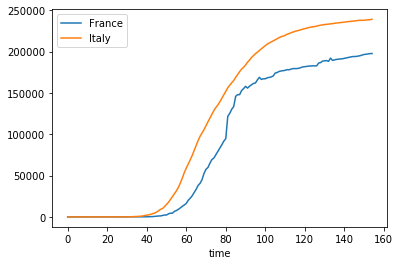

In [209]:
cc.plot(where=['France','Italy'],which='confirmed',what='Cumul') # Caution, Cumul will become cumul (lower case)

In [199]:
cc.listwhat()

['Cumul', 'Diff', 'cumul', 'daily', 'weekly']

In [200]:
cc.listwhom()

['JHU', 'SPF']

In [210]:
cc.listwhich()

['deaths', 'confirmed', 'recovered']

In [201]:
cc.setwhom('JHU')

['deaths', 'confirmed', 'recovered']

# Sandbox

In [144]:
from importlib import reload

In [196]:
reload(cc)

<module 'cocoa.cocoa' from '../cocoa/cocoa.py'>

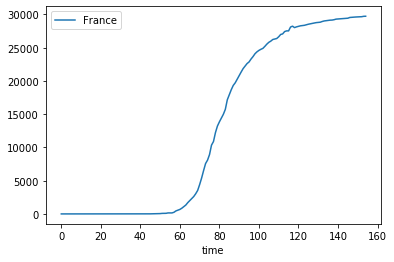

In [198]:
cc.plot(where='France',which='deaths',what='Cumul')

In [186]:
import cocoa.covid19 as coco

In [194]:
reload(coco)

<module 'cocoa.covid19' from '../cocoa/covid19.py'>

In [195]:
mydb=coco.db('JHU')
mydb.getFields()

['deaths', 'confirmed', 'recovered']

In [150]:
help(cc)

Help on module cocoa.cocoa in cocoa:

NAME
    cocoa.cocoa

DESCRIPTION
    Project : CoCoA - Copyright © CoCoa-team-17 
    Date :    april-june 2020
    Authors : Olivier Dadoun, Julien Browaeys, Tristan Beau
    License: See joint LICENSE file
    
    About
    ----- 
    
    This is the CoCoA front end functions. It provides easy access and 
    use of the whole CoCoA framework in a simplified way.
    
    The use can change the database, the type of data, the output format
    with keywords (see help of functions below).
    
    Basic usage
    -----------
    
    ** plotting covid deaths (default value) vs. time **
    
        import cocoa.cocoa as cc
        cc.plot(where='France')  # where keyword is mandatory
    
    ** getting recovered data for some countries **
        
        cc.get(where=['Spain','Italy'],
    
    ** listing available database and which data can be used **
        cc.listbase()
        cc.setbase()     # return available keywords (aka 'which' dat

In [82]:
import pandas as pd
ts = pd.Series(z.cases.to_numpy(), index=z.date)
type(ts)

pandas.core.series.Series

In [84]:
ts1=pd.Series(z[z.country=="Spain"].cases.to_numpy(), index=z[z.country=="Spain"].date)
ts2=pd.Series(z[z.country=="Italy"].cases.to_numpy(), index=z[z.country=="Italy"].date)

In [92]:
zz=pd.DataFrame({"country":z.country.unique(),"ts":[ts1,ts2]})
zz.head()

,country,ts
0,Italy,date 2020-01-22 0 2020-01-23 0 2...
1,Spain,date 2020-01-22 0 2020-01-23 0 2...


In [98]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Grid, Line, LinearAxis, Plot
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [99]:
fig=figure()

In [110]:
fig.line(x='date',y='cases',source=z)
show(fig)

# Other stuff. Oliv' branch